# Support vector machine 
#### What are Support Vectors and the hyperplane ?

![alt text](https://www.dtreg.com/uploaded/pageimg/SvmMargin2.jpg "Logo Title Text 1")
 
### Whats a hyperplane?

![alt text](http://slideplayer.com/slide/1579281/5/images/32/Hyperplanes+as+decision+surfaces.jpg "Logo Title Text 1")

Geometry tells us that a hyperplane is a subspace of one dimension less than its ambient space. For instance, a hyperplane of an n-dimensional space is a flat subset with dimension n − 1. By its nature, it separates the space into two half spaces.

## Linear vs nonlinear classification?

Sometimes our data is linearly seperable. That means for N classes with M features, we can learn a mapping that is a linear combination. (like y = mx + b). Or even a multidimensional hyperplane (y = x + z + b + q). No matter how many dimensions/features a set of classes have, we can represent the mapping using a linear function.

But sometimes its not. Like if there was a quadratic mapping. Luckily for us SVMs can can efficiently perform a non-linear classification using what is called the kernel trick. I'll talk about that lter on in the course. 

![alt text](https://media.licdn.com/mpr/mpr/AAEAAQAAAAAAAAuSAAAAJDlhYzcwMzhlLTA0MjYtNDEyYS1hMWM4LTE3Zjk5NDlhNzVkMQ.png "Logo Title Text 1")

Alright let's get to building!

**Import liberaries**

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

#Mount Gdrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Read the data**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Machine learning Workshop/code/new_dummy_data_svm.csv")

features = pd.DataFrame(data={'x1': data['x1'].to_numpy(),'x2': data['x2'].to_numpy(),'bias': np.random.default_rng().integers(low=-1, high=-0.99,size=100)}).to_numpy()

targets =  data['y']

print(data)

    Unnamed: 0    x1    x2  y
0            0   4.0  1.62 -1
1            1  10.0  6.83  1
2            2   3.0  2.46 -1
3            3  15.0  5.16  1
4            4   1.0  2.92 -1
..         ...   ...   ... ..
95          95  10.0  6.16  1
96          96   4.0  1.95 -1
97          97   9.0  6.44  1
98          98   2.0  1.14 -1
99          99  13.0  5.49  1

[100 rows x 4 columns]


**Plot our Data**

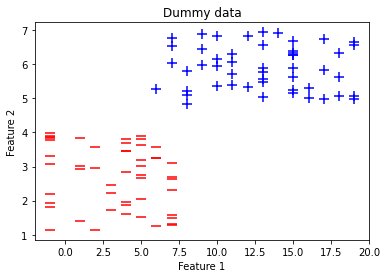

In [ ]:
def plot_data (data):
  for d,row in data.iterrows():
    if row['y'] == -1:
      plt.scatter(row['x1'],row['x2'], s=120, marker='_',color='red', linewidths=2)
    if row['y'] == 1:
        plt.scatter(row['x1'],row['x2'], s=120, marker='+',color='blue', linewidths=2)

  plt.xlabel("Feature 1")
  plt.ylabel("Feature 2")
  plt.title("Dummy data")
  

plot_data(data)  
plt.show()

**Define Model baseLine and hyper parameters**

In [ ]:
# Y = W * X  
def my_model(x,w):
  return np.dot(x, w)

initial_wieghts = np.zeros(len(X[0])+1)  #Init our model wieghts
learning_rate = 1
num_iterations = 10000

In [ ]:
np.zeros(len(X[0])+1) 

array([0., 0., 0.])

## Let's define our loss function (what to minimize) and our objective function (what to optimize)

#### Loss function

We'll use the Hinge loss. This is a loss function used for training classifiers. The hinge loss is used for "maximum-margin" classification, most notably for support vector machines (SVMs).

![alt text](http://i.imgur.com/OzCwzyN.png "Logo Title Text 1")


c is the loss function, x the sample, y is the true label, f(x) the predicted label.

![alt text](http://i.imgur.com/FZ7JcG3.png "Logo Title Text 1")

 
#### Objective Function

![alt text](http://i.imgur.com/I5NNu44.png "Logo Title Text 1")

As you can see, our objective of a SVM consists of two terms. The first term is a regularizer, the heart of the SVM, the second term the loss. The regularizer balances between margin maximization and loss. We want to find the decision surface that is maximally far away from any data points.

How do we minimize our loss/optimize for our objective (i.e learn)?

We have to derive our objective function to get the gradients! Gradient descent ftw.  As we have two terms, we will derive them seperately using the sum rule in differentiation.


![alt text](http://i.imgur.com/6uK3BnH.png "Logo Title Text 1")

This means, if we have a misclassified sample, we update the weight vector w using the gradients of both terms, else if classified correctly,we just update w by the gradient of the regularizer.



* Misclassification condition 

![alt text](http://i.imgur.com/g9QLAyn.png "Logo Title Text 1")

* Update rule for our weights (misclassified)

![alt text](http://i.imgur.com/rkdPpTZ.png "Logo Title Text 1")

* Update rule for our weights (correctly classified)

![alt text](http://i.imgur.com/xTKbvZ6.png "Logo Title Text 1")


In [ ]:
def train(X, Y , w):
    errors = []
    weights = w

    #training part, gradient descent part
    for epoch in range(1,num_iterations):
        error = 0
        # for each datapoint
        for i, x in enumerate(X):
           
            #misclassification
            if (Y[i]* my_model(X[i], weights)) < 1:
                #misclassified update for ours weights
                weights = weights + learning_rate * ( (X[i] * Y[i]) + (-2  *(1/epoch)* weights) )
                error = 1
            else:
                #correct classification, update our weights
                weights = weights + learning_rate * (-2  *(1/epoch)* weights)
        errors.append(error)
        

    #lets plot the rate of classification errors during training for our SVM
    plt.plot(errors, '|')
    plt.ylim(0.5,1.5)
    plt.axes().set_yticklabels([])
    plt.xlabel('Epoch')
    plt.ylabel('Misclassified')
    plt.show()
    
    return weights

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


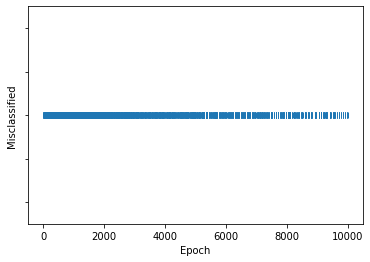

[ 2.45378916  4.95083922 35.76504654]


In [ ]:
final_w = train(features,targets,initial_wieghts)
print(final_w)
#they decrease over time! Our SVM is learning the optimal hyperplane

[0. 0. 0.]
[ 2.45378916  4.95083922 35.76504654]


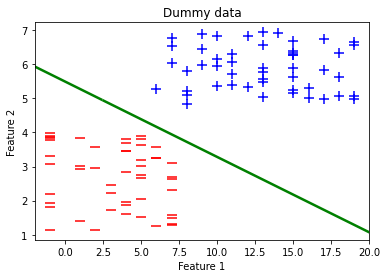

In [ ]:
 #Plot our  data 
plot_data(data)
print(initial_wieghts)
print(final_w)

w =  final_w
x2=[w[0],w[1],-w[1],w[0]]
x3=[w[0],w[1],w[1],-w[0]]

x2x3 =np.array([x2,x3])
m,n,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(m,n,U,V,scale=1, color='green')

-17.92953038335283